In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
df_pre = pd.read_csv('emotion_no_fear.csv')

df_all = df_pre.sample(frac=1)

df_all

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,emotion
1364,0.74,0.00,1.50,0.00,0.70,0.82,0.44,0.00,1.29,1.24,0.00,0.08,0.04,0.00,0.00,0.00,0.00,2
2848,0.00,0.00,2.29,0.00,2.98,3.98,1.36,2.36,1.54,3.12,0.27,0.00,1.92,0.00,4.33,2.78,0.00,4
3684,0.74,1.47,0.11,1.82,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.91,0.00,0.00,5
4410,0.06,0.00,0.00,0.00,0.28,0.00,0.59,1.39,0.69,0.75,1.10,0.22,1.13,0.00,2.35,0.00,0.00,5
2931,1.96,0.51,4.26,0.00,2.09,1.98,0.91,1.71,1.05,1.25,1.22,3.37,0.00,0.40,0.00,1.60,0.38,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1.09,0.00,0.30,0.00,1.45,3.56,0.18,1.73,1.25,0.00,0.00,0.00,0.70,0.10,1.12,0.91,0.00,2
3264,2.36,0.20,2.16,0.00,1.77,0.85,0.33,2.06,1.25,1.09,3.07,2.55,0.70,0.00,1.36,0.00,2.50,4
1653,0.00,0.00,0.00,0.00,0.31,0.00,0.00,0.64,0.92,1.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2
2607,2.91,0.97,1.95,0.00,0.70,3.28,0.00,0.00,0.25,0.72,0.95,0.44,0.59,0.00,1.50,0.57,0.41,4


In [5]:
dataset = df_all.values
dataset.shape

(4473, 18)

In [6]:
from sklearn.preprocessing import LabelEncoder
X = dataset[:,:-1].astype(float) # confidence 제외
Y = dataset[:,-1]
# 원-핫 인코딩
import tensorflow as tf
Y_encoded = tf.keras.utils.to_categorical(Y)
print(Y_encoded) # 분류를 0 1 2 > [1,0,0] , [0,1,0], [0,0,1] 로 변경

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y_encoded,
                                                 test_size = 0.25)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3354, 17)
(1119, 17)
(3354, 6)
(1119, 6)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import numpy as np
from tensorflow.keras import optimizers

Epoch 1/5000
45/45 [==============================] - 1s 5ms/step - loss: 1.3730 - accuracy: 0.4339 - val_loss: 1.1330 - val_accuracy: 0.6061

Epoch 00001: val_loss improved from inf to 1.13297, saving model to ./model\01-1.1330.hdf5
Epoch 2/5000
45/45 [==============================] - 0s 2ms/step - loss: 0.9795 - accuracy: 0.6498 - val_loss: 0.9454 - val_accuracy: 0.6621

Epoch 00002: val_loss improved from 1.13297 to 0.94542, saving model to ./model\02-0.9454.hdf5
Epoch 3/5000
45/45 [==============================] - 0s 1ms/step - loss: 0.8490 - accuracy: 0.7032 - val_loss: 0.8631 - val_accuracy: 0.6739

Epoch 00003: val_loss improved from 0.94542 to 0.86312, saving model to ./model\03-0.8631.hdf5
Epoch 4/5000
45/45 [==============================] - 0s 2ms/step - loss: 0.7709 - accuracy: 0.7308 - val_loss: 0.7958 - val_accuracy: 0.7064

Epoch 00004: val_loss improved from 0.86312 to 0.79582, saving model to ./model\04-0.7958.hdf5
Epoch 5/5000
45/45 [==============================] 

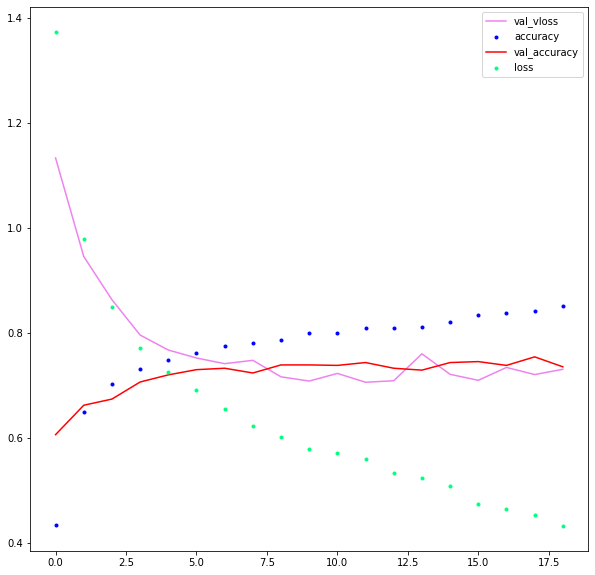

In [20]:
# 딥러닝 구조를 결정하기
model = Sequential()
model.add(Dense(300,input_dim=17,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(6,activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=7)

# 모델 저장 폴더 설정
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor="val_loss",
                               verbose=1,
                               save_best_only=True)
# save_best_only : 값이 개선된 것만 save하겠다.

# 모델 실행 및 저장

history = model.fit(X_train,Y_train,
                    validation_split=0.33,
                    epochs=5000,
                    batch_size=50,
                    callbacks=[early_stopping_callback,checkpointer])

# y_loss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']
y_loss = history.history['loss']

# x값을 저장하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(10,10))
plt.plot(x_len,y_vloss,'-',c='violet',markersize=3,label='val_vloss')
plt.plot(x_len,y_acc,'o',c='blue',markersize=3,label='accuracy')
plt.plot(x_len,y_vacc,'-',c='red',markersize=3,label='val_accuracy')
plt.plot(x_len,y_loss,'o',c='springgreen',markersize=3,label='loss')

plt.legend()
plt.show()

In [32]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [33]:
# X_test.shape
index_list = np.where(1 == Y_test)
print(index_list[1]) # 원핫코딩으로 0과1로 만들어진 클래스를 원래 0~6까지의 클래스로 다시 전환

[3 4 0 ... 2 2 2]


In [34]:
new_y = model.predict(X_test)

print(new_y)
print(new_y.shape)

emotion_list = ['angry','disgust','happy','neutral','sad','surprise']

new_y = model.predict(X_test)
#print(new_y)
#print(new_y.shape)

emotion_list = ['angry','disgust','happy','neutral','sad','surprise']

right = 0
error = 0


for i in range(new_y.shape[0]):
  index_no = new_y[i].argmax() # 예측값이 가장 큰 것의 인덱스를 의미함.
  #print("Predict_Ans %d %s" %(i,emotion_list[index_no])) # 가장 큰 인덱스를 가진 것을 감정으로 출력

  if index_no == index_list[1][i]:
    right += 1
  else : error += 1
'''
  if 1 == index_list[1][i]:
    print('Real_Ans : %d angry' %(i))
    print("disgust확률:{}".format(new_y[0][0]))
    print("==================")
  elif 0 == index_list[1][i]:
    print('Real_Ans : %d disgust' %(i))
    print("angry확률:{}".format(new_y[0][1]))
    print("==================")
  elif 2 == index_list[1][i]:
    print('Real_Ans : %d happy' %(i))
    print("happy확률:{}".format(new_y[0][2]))
    print("==================")
  elif 3 == index_list[1][i]:
    print('Real_Ans : %d neutral' %(i))
    print("neutral확률:{}".format(new_y[0][3]))
    print("==================")
  elif 4 == index_list[1][i]:
    print('Real_Ans : %d sad' %(i))
    print("sad확률:{}".format(new_y[0][4]))
    print("==================")
  elif 5 == index_list[1][i]:
    print('Real_Ans : %d surprise' %(i))
    print("surprise확률:{}".format(new_y[0][5]))

    print("==================")
 
'''
print("정답:",right)
print("오답:",error)
print("정답률:",right/(right+error))

[[6.6096805e-02 1.7649708e-02 3.4007709e-03 8.5558343e-01 3.4564145e-02
  2.2705117e-02]
 [9.3472517e-01 8.8239519e-04 1.7625054e-04 1.7072570e-02 2.4954896e-02
  2.2188729e-02]
 [4.3696275e-01 3.2080278e-02 4.4483868e-03 2.3968676e-01 2.6067588e-02
  2.6075426e-01]
 ...
 [2.8586796e-02 3.3219047e-02 7.2643203e-01 1.3201614e-02 1.9156957e-01
  6.9910469e-03]
 [2.7019191e-03 4.1027492e-04 9.9555343e-01 6.3789892e-05 4.5574800e-04
  8.1485522e-04]
 [5.7105650e-03 6.4367708e-03 9.2634892e-01 1.9388573e-03 5.8219567e-02
  1.3453363e-03]]
(1119, 6)
정답: 845
오답: 274
정답률: 0.7551385165326184


In [36]:
# 각 감정의 정답률 개별적 파악
emotion_csv_path =['angry.csv',
                   'disgust.csv',
                   'happy.csv',
                   'neutral.csv',
                   'sad.csv',
                   'surprise.csv']

emotion_list = ['angry','disgust','happy','neutral','sad','surprise']

x = 0

#시각화를 위한 부분
test_pred_list = []
test_true_list = []

for path in emotion_csv_path:
  emotion_pre = pd.read_csv(path)
  emotion = emotion_pre.sample(frac=1)
  emotion_dataset = emotion.values
  
  emotion_x = emotion_dataset[:,:-1]
  emotion_y = emotion_dataset[:,-1]

  pred_emotion = model.predict(emotion_x)
    #print(pred_emotion)
   #print(pred_emotion.shape)

  right = 0
  error = 0
  print("Real_Ans:",emotion_list[x])

  for i in range(pred_emotion.shape[0]):
    index_num = pred_emotion[i].argmax()
    #print("Predict_Ans: %d번 예측감정 %s" %(i,emotion_list[index_num]))
    
    #시각화를 위한 부분
    test_true_list.append(x)
    test_pred_list.append(index_num)
    


    if index_num == x :
      right += 1
    else: 
      error += 1

  print("{}의 index:".format(emotion_list[x]))
  print("정답:",right)
  print("오답:",error)
  print("정답률:",right/(right+error)) 
  x += 1
  print("===================================")

Real_Ans: angry
angry의 index:
정답: 416
오답: 296
정답률: 0.5842696629213483
Real_Ans: disgust
disgust의 index:
정답: 137
오답: 82
정답률: 0.6255707762557078
Real_Ans: happy
happy의 index:
정답: 648
오답: 117
정답률: 0.8470588235294118
Real_Ans: neutral
neutral의 index:
정답: 637
오답: 62
정답률: 0.9113018597997139
Real_Ans: sad
sad의 index:
정답: 850
오답: 188
정답률: 0.8188824662813102
Real_Ans: surprise
surprise의 index:
정답: 895
오답: 145
정답률: 0.8605769230769231


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

#More Analysis using Confusion Matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #title이 false일 때 실행
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    
    if normalize:
        #백분율로 보기위해 정규화 계산
        #axis=1: y축(True label)값을 기준으로 한 sum의 합이 1
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    #fig: 그림, ax: 그림에 그려질 그래프
    fig, ax = plt.subplots(figsize=(12,6))
    #interpolation: 
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

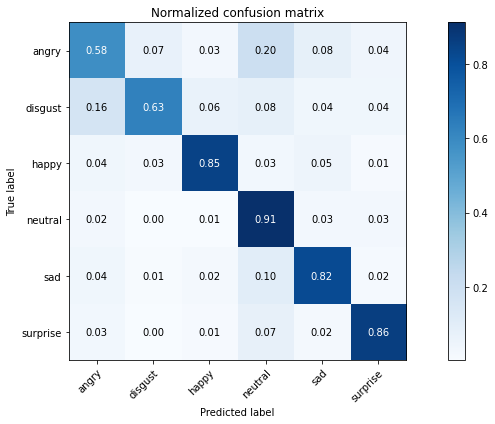

In [38]:
#print(emotion_y)
#print(test_pred_list)

#실제 값들의 리스트
test_true = test_true_list
#예측 값들의 리스트
test_pred = test_pred_list

emotion_labels = emotion_list

# Plot normalized confusion matrix
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.show()
